In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import project_functions
df = project_functions.load_and_process("../../data/raw/Medical Expenses.csv")
df



,Age,Sex,BMI,Number of Children,Smoker,Place of Residence,Medical Insurance Charges
0,19,Female,27.900,0,Yes,S.W.,16884.92400
1,18,Male,33.770,1,No,S.E.,1725.55230
2,28,Male,33.000,3,No,S.E.,4449.46200
3,33,Male,22.705,0,No,N.W.,21984.47061
4,32,Male,28.880,0,No,N.W.,3866.85520
...,...,...,...,...,...,...,...
1333,50,Male,30.970,3,No,N.W.,10600.54830
1334,18,Female,31.920,0,No,N.E.,2205.98080
1335,18,Female,36.850,0,No,S.E.,1629.83350
1336,21,Female,25.800,0,No,S.W.,2007.94500


**Use `.info` to ensure there are no NaN values in dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1338 non-null   int64  
 1   Sex                        1338 non-null   object 
 2   BMI                        1338 non-null   float64
 3   Number of Children         1338 non-null   int64  
 4   Smoker                     1338 non-null   object 
 5   Place of Residence         1338 non-null   object 
 6   Medical Insurance Charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Use `.describe` to get an overview of the numerical data in the dataset**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
BMI,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
Number of Children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
Medical Insurance Charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Use `.pairplot` to show the correlation between pairs of numerical variables**

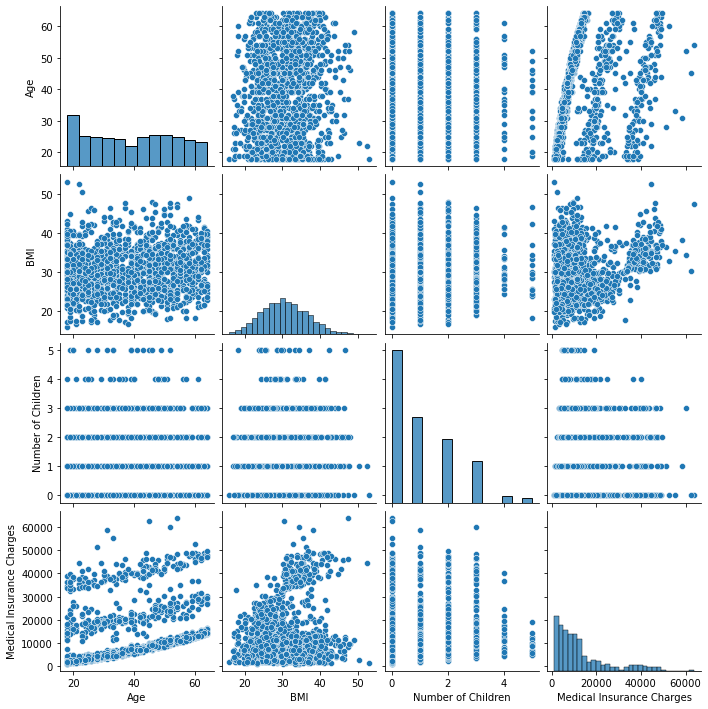

In [6]:
sns.pairplot(df)

**Use `.displot` to take a closer look at the distribution of medical insurance charges**

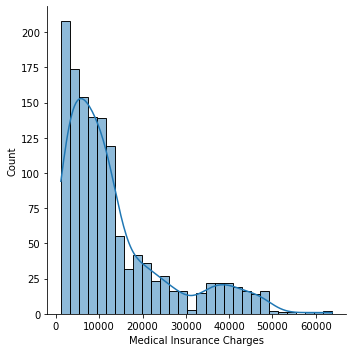

In [7]:
sns.displot(data=df, x="Medical Insurance Charges", kde=True)

In [8]:
charges_ranges = [0,10000,20000,30000,40000,50000,60000,70000]
charges_groups = ['0-10K','10K-20K','20K-30K','30K-40K','40K-50K','50K-60K','60K-70K']
df['Charges Groups'] = pd.cut(df['Medical Insurance Charges'].values,charges_ranges,labels=charges_groups,ordered=True)
df = df.sort_values(by=['Medical Insurance Charges'])
df

,Age,Sex,BMI,Number of Children,Smoker,Place of Residence,Medical Insurance Charges,Charges Groups
940,18,Male,23.210,0,No,S.E.,1121.87390,0-10K
808,18,Male,30.140,0,No,S.E.,1131.50660,0-10K
1244,18,Male,33.330,0,No,S.E.,1135.94070,0-10K
663,18,Male,33.660,0,No,S.E.,1136.39940,0-10K
22,18,Male,34.100,0,No,S.E.,1137.01100,0-10K
...,...,...,...,...,...,...,...,...
819,33,Female,35.530,0,Yes,N.W.,55135.40209,50K-60K
577,31,Female,38.095,1,Yes,N.E.,58571.07448,50K-60K
1230,52,Male,34.485,3,Yes,N.W.,60021.39897,60K-70K
1300,45,Male,30.360,0,Yes,S.E.,62592.87309,60K-70K


<AxesSubplot:xlabel='Charges Groups', ylabel='count'>

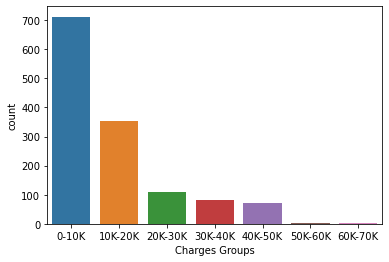

In [9]:
sns.countplot(data=df,x='Charges Groups')

It is clear that most charges are in the below $10,000 category

**Use bins to categorize the ages**

In [10]:
age_ranges = [15,25,35,45,55,65]
age_groups = ['15-25','25-35','35-45','45-55','55-65']
df['Age Groups'] = pd.cut(df.Age,age_ranges,labels=age_groups,ordered=True)
df.sort_values(by=['Age'])
df

,Age,Sex,BMI,Number of Children,Smoker,Place of Residence,Medical Insurance Charges,Charges Groups,Age Groups
940,18,Male,23.210,0,No,S.E.,1121.87390,0-10K,15-25
808,18,Male,30.140,0,No,S.E.,1131.50660,0-10K,15-25
1244,18,Male,33.330,0,No,S.E.,1135.94070,0-10K,15-25
663,18,Male,33.660,0,No,S.E.,1136.39940,0-10K,15-25
22,18,Male,34.100,0,No,S.E.,1137.01100,0-10K,15-25
...,...,...,...,...,...,...,...,...,...
819,33,Female,35.530,0,Yes,N.W.,55135.40209,50K-60K,25-35
577,31,Female,38.095,1,Yes,N.E.,58571.07448,50K-60K,25-35
1230,52,Male,34.485,3,Yes,N.W.,60021.39897,60K-70K,45-55
1300,45,Male,30.360,0,Yes,S.E.,62592.87309,60K-70K,35-45


**Use `.countplot` to see the distribution of ages based on the categorization**

<AxesSubplot:xlabel='Age Groups', ylabel='count'>

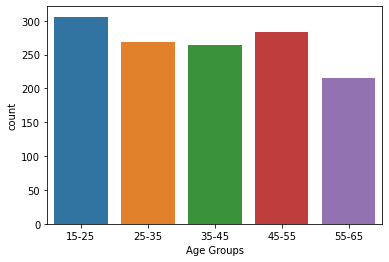

In [11]:
sns.countplot(data=df,x='Age Groups')

It is good to see that the age groups are roughly evenly distributed. This will help us get a clearer image of the medical insurance charges across the population

***Use `.scatterplot` to take a closer look at the correlation between age and medical insurance charges. One of our research questions.***

<AxesSubplot:xlabel='Age', ylabel='Medical Insurance Charges'>

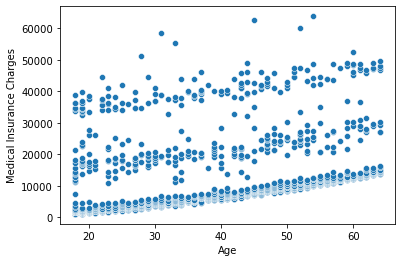

In [12]:
sns.scatterplot(data=df,x="Age",y="Medical Insurance Charges")

**Use `.groupby` to calculate the mean medical insurance charge based on age group**

In [13]:
round(df.groupby('Age Groups')['Medical Insurance Charges'].mean(),2)

Age Groups
15-25     9087.02
25-35    10495.16
35-45    13493.49
45-55    15986.90
55-65    18795.99
Name: Medical Insurance Charges, dtype: float64

It seems like older individuals are charges more for insurance than younger individuals based on the scatterplots and the means

**Use bins to categorize the BMI values**

In [14]:
BMI_ranges = [float("-inf"),18.5,25,30,float("inf")]
BMI_groups = ['Underweight','Normal Weight','Overweight','Obese']
df['BMI Category'] = pd.cut(df.BMI,BMI_ranges,labels=BMI_groups,ordered=True)
df = df.sort_values(by=['BMI'])
df

,Age,Sex,BMI,Number of Children,Smoker,Place of Residence,Medical Insurance Charges,Charges Groups,Age Groups,BMI Category
172,18,Male,15.960,0,No,N.E.,1694.79640,0-10K,15-25,Underweight
1226,38,Male,16.815,2,No,N.E.,6640.54485,0-10K,35-45,Underweight
428,21,Female,16.815,1,No,N.E.,3167.45585,0-10K,15-25,Underweight
412,26,Female,17.195,2,Yes,N.E.,14455.64405,10K-20K,25-35,Underweight
1286,28,Female,17.290,0,No,N.E.,3732.62510,0-10K,25-35,Underweight
...,...,...,...,...,...,...,...,...,...,...
286,46,Female,48.070,2,No,N.E.,9432.92530,0-10K,45-55,Obese
116,58,Male,49.060,0,No,S.E.,11381.32540,10K-20K,55-65,Obese
847,23,Male,50.380,1,No,S.E.,2438.05520,0-10K,15-25,Obese
1047,22,Male,52.580,1,Yes,S.E.,44501.39820,40K-50K,15-25,Obese


<AxesSubplot:xlabel='BMI Category', ylabel='count'>

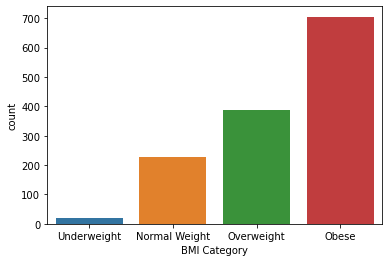

In [15]:
sns.countplot(data=df,x='BMI Category')

There is a surprisingly high amount of obese individuals in the study. This is no surprise since America has a very high obesity rate. It would have been more interesting to have a more even distribution.

***Use `.scatterplot` to take a closer look at the correlation between BMI and medical insurance charges. One of our research questions.***

<AxesSubplot:xlabel='BMI', ylabel='Medical Insurance Charges'>

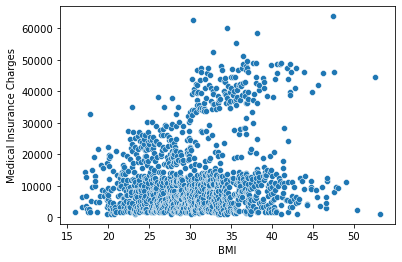

In [16]:
sns.scatterplot(data=df,x="BMI",y="Medical Insurance Charges")

**Use `.groupby` to calculate the mean medical insurance charge based on BMI Category**

In [17]:
round(df.groupby('BMI Category')['Medical Insurance Charges'].mean(),2)

BMI Category
Underweight       8657.62
Normal Weight    10435.44
Overweight       10997.80
Obese            15560.93
Name: Medical Insurance Charges, dtype: float64

It appears that higher BMI leads to higher insurance charges based on the scatterplot and means

***Use `.scatterplot` to take a closer look at the correlation between number of children and medical insurance charges. One of our research questions.***

<AxesSubplot:xlabel='Number of Children', ylabel='Medical Insurance Charges'>

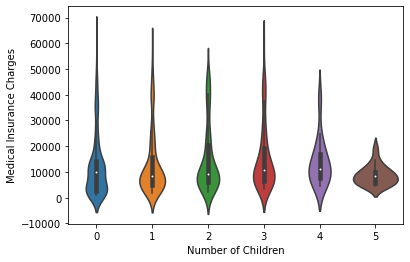

In [18]:
sns.violinplot(data=df,x="Number of Children",y="Medical Insurance Charges")

The distribution of charges seems somewhat even until the individuals with 5 children. Individuals with 5 children have considerable lower costs on average. 

**Use `.displot` to show the distribution of medical insurance charges for smokers**

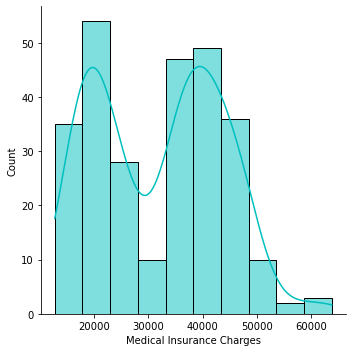

In [21]:
sns.displot(df[df.Smoker=='Yes'],x='Medical Insurance Charges',color='c',kde=True)

**Use `.displot` to show the distribution of medical insurance charges for non-smokers**

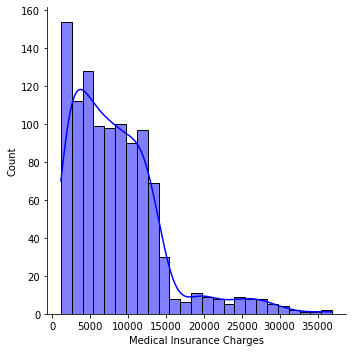

In [22]:
sns.displot(df[df.Smoker=='No'],x='Medical Insurance Charges',color='b',kde=True)

**Use `.groupby` to calculate the mean medical insurance charge based on Smoking Habits**

In [23]:
round(df.groupby('Smoker')['Medical Insurance Charges'].mean(),2)

Smoker
No      8434.27
Yes    32050.23
Name: Medical Insurance Charges, dtype: float64

Smokers are charges considerably more on average than non-smokers

***User `.countplot` to see the distribution of sexes***

<AxesSubplot:xlabel='Sex', ylabel='count'>

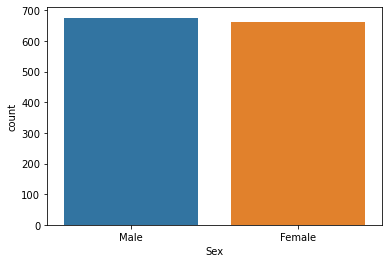

In [24]:
sns.countplot(data=df,x='Sex')

The number of males and females is almost equal which will help yeild more reliable results for the gender bias study

**Use `.displot` to show the distribution of medical insurance charges for males**

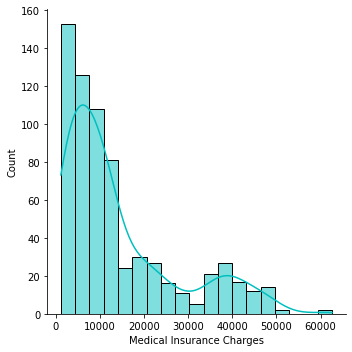

In [26]:
sns.displot(df[df.Sex=='Male'],x='Medical Insurance Charges',color='c',kde=True)

**Use `.displot` to show the distribution of medical insurance charges for females**

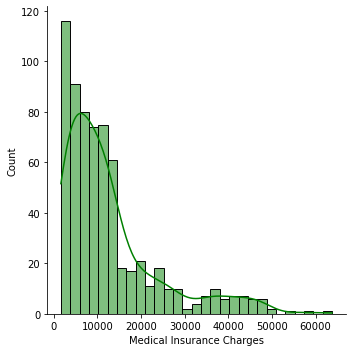

In [27]:
sns.displot(df[df.Sex=='Female'],x='Medical Insurance Charges',color='green',kde=True)

***Use `.groupby()` to calculate the mean medical insurance charge based on sex***

In [28]:
round(df.groupby('Sex')['Medical Insurance Charges'].mean(),2)

Sex
Female    12569.58
Male      13956.75
Name: Medical Insurance Charges, dtype: float64

It seems that men are charged more for medical insurance on average

***Use `.lineplot` to show trend in medical insurance costs as age increases***

<AxesSubplot:xlabel='Age', ylabel='Medical Insurance Charges'>

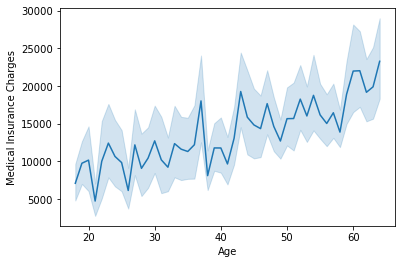

In [29]:
sns.lineplot(data=df,x='Age',y='Medical Insurance Charges')

There is a clear increase in medical insurance charges as individuals age

Use `.boxplot` to show the distribution of medical costs over the quadrants

<AxesSubplot:xlabel='Place of Residence', ylabel='Medical Insurance Charges'>

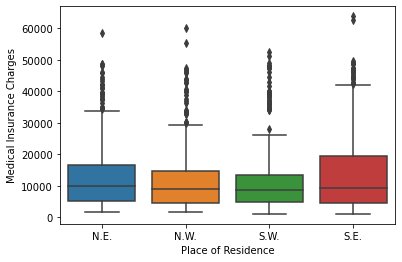

In [31]:
sns.boxplot(data=df,x='Place of Residence',y='Medical Insurance Charges')

Use `.groupby` to calculate the mean medical insurance charge based on sex

In [32]:
round(df.groupby('Place of Residence')['Medical Insurance Charges'].mean(),2)

Place of Residence
N.E.    13406.38
N.W.    12417.58
S.E.    14735.41
S.W.    12346.94
Name: Medical Insurance Charges, dtype: float64

Individuals who live southeast are charged more for medical insurance on average

Based on this EDA, the combination of being elderly, being male, having a high BMI, having few children, being a smoker and living in the souteast would yield the highest medical insurance costs in theory. Also, being young, being female, having a low BMI, having more children, being a non-smoker and living in the soutwest would yield the lowest medical insurance costs in theory.  

In [33]:
df.to_csv("RaviDataframeExcel.csv")